In [1]:
import subprocess
import os


result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

In [1]:
import os
os.environ['HF_HOME'] = '/root/autodl-tmp'

In [3]:
import pandas as pd

file_path = 'entities.tsv'
df = pd.read_csv(file_path, sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'entities.tsv'

In [11]:
df.loc[:,'name']

0                    obsolete sudden onset of severe chills
1                                         dry hacking cough
2                                   pulmonary consolidation
3                                                  enanthem
4                                                   anxiety
                                ...                        
814974                               IL-9 signaling pathway
814975            Complement activation - classical pathway
814976                                    Heme biosynthesis
814977    FAS pathway and stress induction of HSP regula...
814978          Hepatocyte growth factor receptor signaling
Name: name, Length: 814979, dtype: object

In [12]:
df.loc[:,'id']

0              SYMP:0000149
1              SYMP:0000259
2              SYMP:0000729
3              SYMP:0000746
4              SYMP:0000412
                ...        
814974     WikiPathways:WP8
814975    WikiPathways:WP81
814976    WikiPathways:WP86
814977    WikiPathways:WP89
814978    WikiPathways:WP94
Name: id, Length: 814979, dtype: object

In [2]:
import transformers_embedder as tre

tokenizer = tre.Tokenizer("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

model = tre.TransformersEmbedder(
    "microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext", subword_pooling_strategy="sparse", layer_pooling_strategy="mean"
)



Some weights of the model checkpoint at microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:
import torch


example = "pneumonoultramicroscopicsilicovolcanoconiosis"

inputs = tokenizer([example, "hello"], return_tensors=True, padding=True)
outputs = model(**inputs)
torch.norm(outputs.word_embeddings[:,1])

tensor(24.4793, grad_fn=<LinalgVectorNormBackward0>)

In [31]:
inputs

{'input_ids': tensor([[    2, 24560, 19815, 10261,  4913,  7771, 28381,  5670, 27602,  8337,
         10332, 10282,     3],
        [    2,  3091,  6012,     3,     0,     0,     0,     0,     0,     0,
             0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'scatter_offsets': tensor([[ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2],
        [ 0,  1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1]]), 'sentence_lengths': [3, 3], 'sparse_offsets': {'sparse_indices': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1],
        [ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  0,  1,  1,  2],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1,  2,  3]]), 'sparse_values': tensor([1.0000, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0

In [26]:
tokenizer.convert_tokens_to_string

AttributeError: 'Tokenizer' object has no attribute 'convert_tokens_to_string'

In [21]:
sent_vecs = embs.sum(dim=1) / embs.count_nonzero(dim=1)
sent_vecs_normalized = sent_vecs / 

In [32]:
import numpy as np
vecs = np.array(sent_vecs.detach().numpy())

In [35]:
import faiss

faiss.normalize_L2(vecs)
d = vecs.shape[1]
index = faiss.IndexFlatIP(d)

In [37]:
index.add(vecs)

In [38]:
query = vecs[100]

In [42]:
k = 100
D, I = index.search(query[np.newaxis, :], k)

In [43]:
print("距离: ", D.flatten())
print("索引: ", I.flatten())

距离:  [0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999 0.9999999
 

In [2]:
import transformers_embedder as tre
import pandas as pd


tokenizer = tre.Tokenizer("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

model = tre.TransformersEmbedder(
    "microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext", subword_pooling_strategy="sparse", layer_pooling_strategy="mean"
)


file_path = 'entities.tsv'
df = pd.read_csv(file_path, sep='\t')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/tmp/ipykernel_852/1121646524.py:13: DtypeWarning: Columns (6,8) have mixed typ

In [4]:
names = df.loc[:,'name'].to_list()
len(names)

581176

In [ ]:
inputs = tokenizer(names[:5000], return_tensors=True, padding=True)
outputs = model(**inputs)

In [2]:
import pandas as pd

file_path = 'entities.tsv'
df = pd.read_csv(file_path, sep='\t')
names = df.loc[:,'name'].to_list()

/tmp/ipykernel_5150/3637672984.py:4: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


In [17]:
lens = [len(name.split()) for name in names]

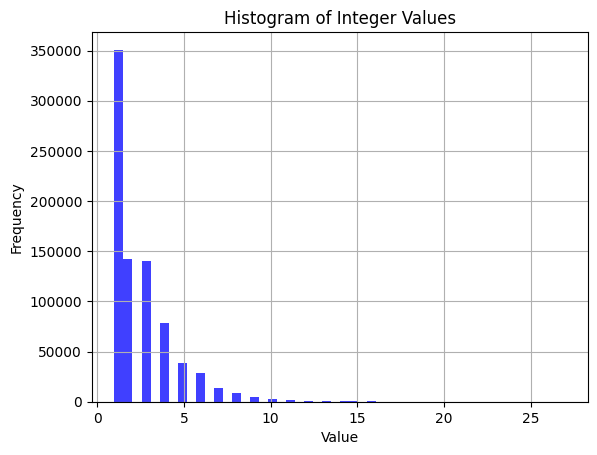

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Example list of integers
data = lens[:] # Generating a sample list of integers

# Plotting the histogram
plt.hist(data, bins=50, alpha=0.75, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Integer Values')
plt.grid(True)
plt.show()

In [40]:
len(names)

814979

In [ ]:
chunk_len = 1000

for i in range(1, 27+1):
    l = [name for j, name in enumerate(names) if len(name.split()) == i]
    idx = [j for j, name in enumerate(names) if len(name.split()) == i]
    print(len(l))
    for j in range(len(l) // chunk_len):
        inputs = tokenizer(l[j*chunk_len:(j+1)*chunk_len], return_tensors=True, padding=True)
        outputs = model(**inputs)
        print(outputs.word_embeddings.shape)
        exit()


350789
torch.Size([1000, 7, 768])
torch.Size([1000, 11, 768])
torch.Size([1000, 11, 768])
torch.Size([1000, 106, 768])


In [27]:
[i for i, name in enumerate(names) if len(name.split()) == 26]

[126728, 391057, 403420]

In [43]:
[name for i, name in enumerate(names) if len(name.split()) == 1]

['enanthem',
 'anxiety',
 'delirium',
 'malaise',
 'blindness',
 'cachexia',
 'coma',
 'pustule',
 'bronchospasm',
 'anuria',
 'confusion',
 'septicemia',
 'constipation',
 'phlebitis',
 'salivation',
 'vasculitis',
 'epididymitis',
 'backache',
 'tachypnea',
 'hoarseness',
 'tinnitus',
 'wheelbarrowing',
 'palpitation',
 'stridor',
 'bloating',
 'crinkle',
 'headache',
 'petechiae',
 'belching',
 'fever',
 'incoordination',
 'eschar',
 'bleeding',
 'wheezing',
 'toxemia',
 'aphasia',
 'epididymorchitis',
 'paralysis',
 'hypoesthesia',
 'cough',
 'gastroenteritis',
 'cataplexy',
 'reticulocytosis',
 'enteritis',
 'flatulence',
 'amaurosis',
 'ascites',
 'hypothermia',
 'lameness',
 'hypokinesia',
 'exhaustion',
 'menorrhagia',
 'stillbirth',
 'dyspepsia',
 'syncope',
 'mydriasis',
 'ptosis',
 'fatigue',
 'catatonia',
 'anorexia',
 'bubo',
 'hypotensive',
 'tetany',
 'tiredness',
 'opisthotonus',
 'irritability',
 'photophobia',
 'hypoxemia',
 'urticaria',
 'stupor',
 'arrhythmia',
 'we

In [32]:
a = list(range(13))

In [34]:
a[10:999]

[10, 11, 12]